# Stats in a Snap: Quickly understanding what Statistics is

## Descriptive Statistics

First, we import essential libraries for data manipulation and visualization. We then load several datasets related to race results, statuses, and race details. These datasets will be merged and manipulated to explore various statistical aspects of race data.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

status = pd.read_csv('../data/status.csv',encoding = "utf-8")
results = pd.read_csv('../data/results.csv', encoding="utf-8")
races = pd.read_csv('../data/races.csv', encoding="utf-8")

races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


### Merging Datasets for Analysis

Next, we merge the `results`, `races`, and `status` datasets to create a comprehensive DataFrame that includes detailed race results along with the race's status information.


In [2]:
colsss = ['raceId', 'year', 'round', 'circuitId', 'name']
my_races = races[colsss]

In [3]:
my_data = pd.merge(results, my_races, on ='raceId', how ='left')
my_data = pd.merge(my_data, status, on ='statusId', how ='left')

my_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,status
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,2008,1,1,Australian Grand Prix,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,2008,1,1,Australian Grand Prix,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,2008,1,1,Australian Grand Prix,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,2008,1,1,Australian Grand Prix,Finished


We further refine the DataFrame by selecting specific columns that are most relevant to our analysis.

In [4]:
my_data.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'status'],
      dtype='object')

In [5]:
columns = ['resultId', 'raceId', 'driverId', 'constructorId', 'points', 'laps', 'statusId', 'year', 'circuitId', 'name',
       'status']

my_data = my_data[columns]
my_data.head()

,resultId,raceId,driverId,constructorId,points,laps,statusId,year,circuitId,name,status
0,1,18,1,1,10.0,58,1,2008,1,Australian Grand Prix,Finished
1,2,18,2,2,8.0,58,1,2008,1,Australian Grand Prix,Finished
2,3,18,3,3,6.0,58,1,2008,1,Australian Grand Prix,Finished
3,4,18,4,4,5.0,58,1,2008,1,Australian Grand Prix,Finished
4,5,18,5,1,4.0,58,1,2008,1,Australian Grand Prix,Finished


### Analyzing Collision Data

We focus on analyzing data related to race collisions. We filter the data to include only entries with specific `statusId` values that indicate some form of collision or accident.

In [6]:
# List of statusId values to include - those who collided

include_ids = [3, 4, 104, 130]

'''
id and keys:
3: Accident
4: Collisions
104: Fatal Accident
130: Collision Damage
'''

# Filter data to exclude specific statusId values and include all the rest
retirements_data = my_data.loc[my_data['statusId'].isin(include_ids)]
retirements_data = retirements_data.drop_duplicates(subset=['raceId', 'driverId'])

### Descriptive Statistics on Collisions

We calculate basic descriptive statistics, including the mean, median, variance, and standard deviation, of the number of collisions per season.

In [7]:
retirements = retirements_data.groupby('year').size()

mean = round(retirements.mean(), 0)
print(f'The average number of collisions in a season is: {mean}')

The average number of collisions in a season is: 26.0


In [8]:
median = round(np.median(retirements), 0)
print(f'Median of the number of collisions in a season is: {median}')

Median of the number of collisions in a season is: 26.0


In [9]:
# Calculate variance
variance = np.var(retirements)
print(f'Variance: {variance}')

Variance: 150.75967859751643


In [10]:
# Calculate standard deviation
std_dev = np.std(retirements)
print(f'Standard Deviation: {std_dev}')

Standard Deviation: 12.278423294442835


### Visualization of Collision Data

A histogram is used to visualize the distribution of the number of collisions per season. This visualization is augmented with lines representing the mean and quantiles of the distribution.

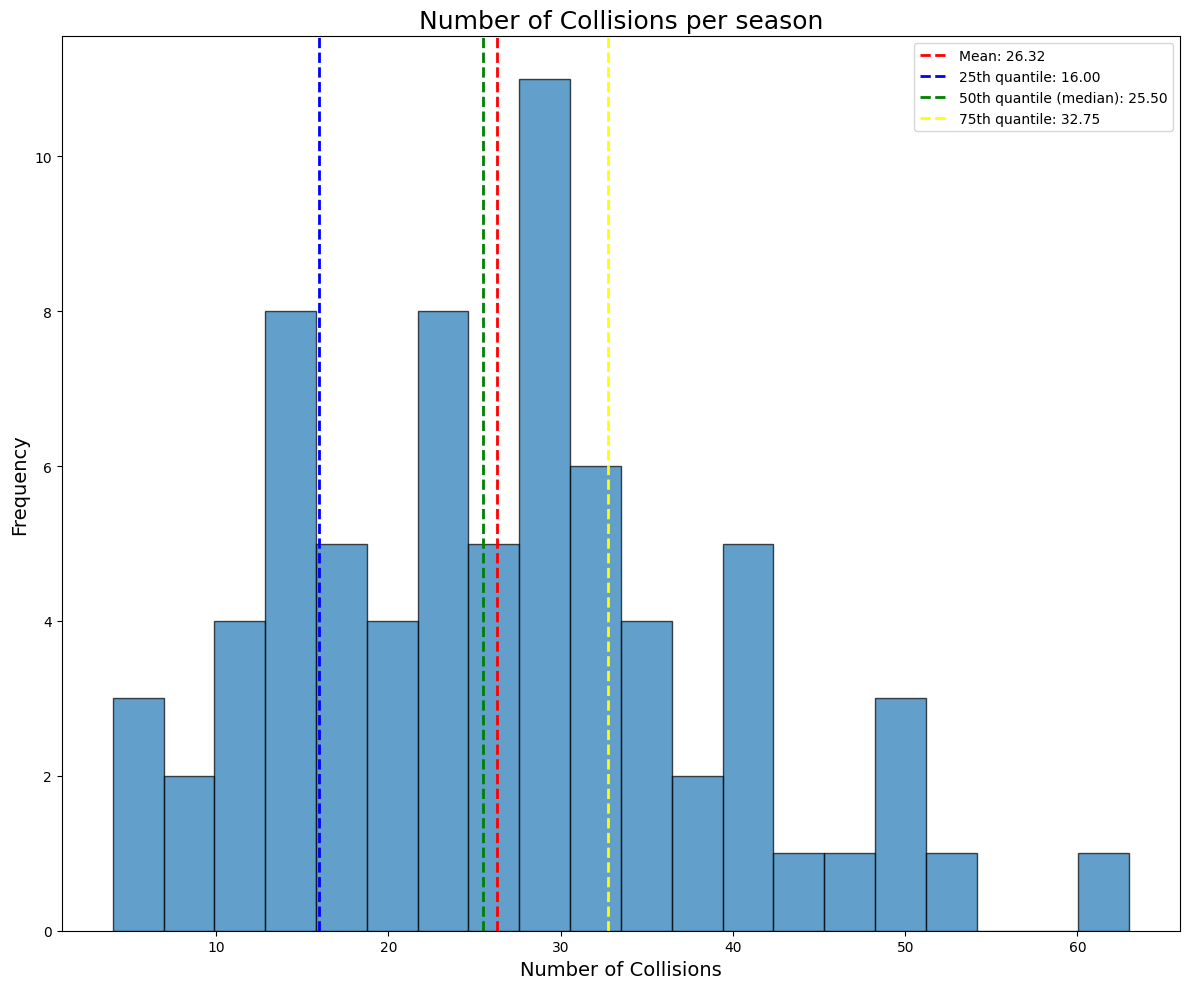

In [11]:
plt.figure(figsize=(12, 10))
plt.hist(retirements, bins = 20, 
             edgecolor = 'black', 
             alpha = 0.7)

# Adding mean and quantiles
mean_val = retirements.mean()
q_25 = retirements.quantile(0.25)
q_50 = retirements.quantile(0.50)
q_75 = retirements.quantile(0.75)

plt.axvline(mean_val, color='red', linestyle='dashed', 
            linewidth=2, label=f"Mean: {mean_val:.2f}")
plt.axvline(q_25, color='blue', linestyle='dashed', 
            linewidth=2, label=f"25th quantile: {q_25:.2f}")
plt.axvline(q_50, color='green', linestyle='dashed', 
            linewidth=2, label=f"50th quantile (median): {q_50:.2f}")
plt.axvline(q_75, color='yellow', linestyle='dashed', 
            linewidth=2, label=f"75th quantile: {q_75:.2f}")

plt.title(f'Number of Collisions per season', fontsize = 18)
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Number of Collisions', fontsize = 14)
plt.legend()
plt.tight_layout()
plt.show()

## Inferential Statistics
### Quick Hypothesis Testing

We proceed to inferential statistics by performing a hypothesis test to determine if the number of collisions has significantly changed before and after 1985.

In [12]:
# import library
from scipy import stats

before = retirements_data[retirements_data['year'] <= 1985].groupby('year').size()
after = retirements_data[retirements_data['year'] > 1985].groupby('year').size()


# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(before, after)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The reduction in the number of collisions per race is statistically significant.")
else:
    print("The reduction in the number of collisions per race is not statistically significant.")

T-statistic: -2.070913774427857
P-value: 0.04195240970755087
The reduction in the number of collisions per race is statistically significant.
